### 1. Simulation of Homogenous poisson process 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. For a simple case

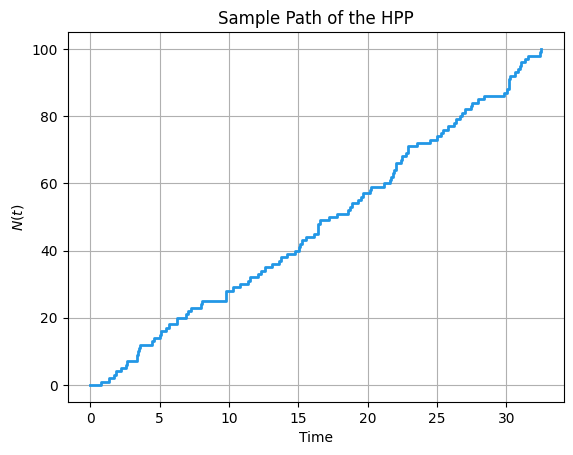

In [2]:
lambda_ = 3
n = 100    
inter_arrival_times = np.random.exponential(1 / lambda_, n)
Tn = np.cumsum(inter_arrival_times)
Tn = np.insert(Tn, 0, 0) 
plt.step(Tn, np.arange(n + 1), where="post", color='#2297E6', linewidth=2)
plt.xlabel("Time")
plt.ylabel(r"$N(t)$")
plt.title("Sample Path of the HPP")
plt.grid(True)
plt.show()

In [3]:
def hpp(m, lambda_rate, T):
    Tn = [0]
    tau = []
    while Tn[-1] <= T:
        tau.append(np.random.exponential(scale=1/lambda_rate))
        Tn.append(Tn[-1] + tau[-1])
    Tn = np.array(Tn)
    t = np.linspace(0, T, m)
    N = np.array([np.sum(Tn <= ti) - 1 for ti in t])
    return N

In [4]:
def plot_paths(X, t0, T):
    if t0 >= T:
        raise ValueError("t0 must be less than T.")
    t = np.linspace(t0, T, X.shape[1])
    plt.figure()
    plt.xlim(0, T)
    plt.ylim(X.min(), X.max())
    plt.xlabel("Time")
    plt.ylabel("N(t)")
    plt.title("Simulation of paths of HPP")
    for path in X:
        plt.step(t, path, where='post', color="#2297E6", linewidth=2)

In [5]:
N_paths = 50
m = 1000
t0 = 0
T = 5
lambda_rate = 3
t = np.linspace(t0, T, m)
X = np.array([hpp(m, lambda_rate, T) for _ in range(N_paths)])

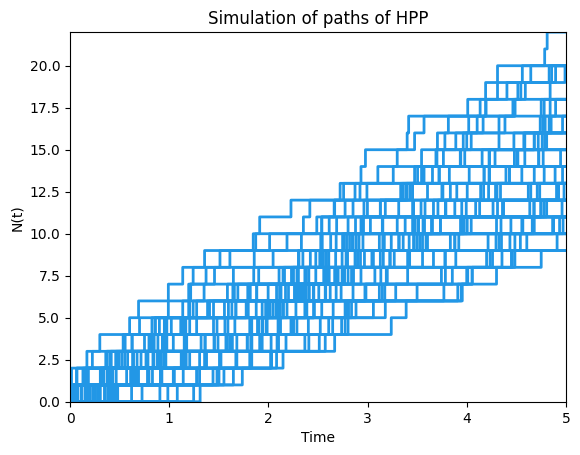

In [6]:
plot_paths(X, t0, T)

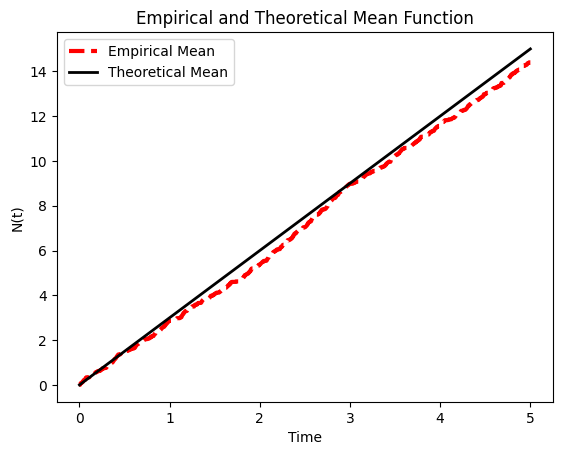

In [7]:
time_points = np.linspace(t0, T, X.shape[1])
plt.plot(time_points, X.mean(axis=0), color='red', linewidth=3, linestyle='--', label='Empirical Mean')
plt.plot(time_points, lambda_rate * time_points, color='black', linewidth=2, label='Theoretical Mean')
plt.legend()
plt.xlabel("Time")
plt.ylabel("N(t)")
plt.title("Empirical and Theoretical Mean Function")
plt.show()

2. Make it more general

In [8]:
def hpp_path(rate, T):
    Tn = [0]
    inter_arrivals = []
    while Tn[-1] <= T:
        inter_arrival = np.random.exponential(scale=1/rate)
        inter_arrivals.append(inter_arrival)
        Tn.append(Tn[-1] + inter_arrival)
    return np.array(Tn[:-1]), np.array(inter_arrivals)

In [9]:
# Simulate multiple paths for multiple rates
def simulate_multiple_rates_and_paths(rates, num_paths, T):
    all_paths = {}
    inter_arrival_data = {}
    for rate in rates:
        paths = []
        inter_arrivals = []
        for _ in range(num_paths):
            path, inter_arrival = hpp_path(rate, T)
            paths.append(path)
            inter_arrivals.extend(inter_arrival)
        all_paths[rate] = paths
        inter_arrival_data[rate] = inter_arrivals
    return all_paths, inter_arrival_data
    

In [10]:
# Plot the combined paths
def plot_combined_paths(all_paths, T):
    plt.figure(figsize=(15, 6))
    color_palette = plt.get_cmap('tab10')
    for i, (rate, paths) in enumerate(all_paths.items()):
        color = color_palette(i)
        for path in paths:
            event_counts = np.arange(1, len(path) + 1)
            plt.step(path, event_counts, where="post", color=color, alpha=0.5)
        plt.plot([], [], label=f"λ = {rate}", color=color, linewidth=2)  # Add legend entry
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Event Count", fontsize=12)
    plt.title("Combined Paths for Multiple Rates", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
# Plot histograms of inter-arrival times
def plot_interarrival_histograms(inter_arrival_data, rates):
    plt.figure(figsize=(15, 6))
    for i, rate in enumerate(rates):
        plt.subplot(1, len(rates), i + 1)
        plt.hist(inter_arrival_data[rate], bins=20, color="green", alpha=0.7)
        plt.title(f"λ = {rate}\nInter-Arrival Times")
        plt.xlabel("Time")
        plt.ylabel("Frequency")
        plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()


In [12]:
# Plot empirical vs theoretical mean
def plot_empirical_vs_theoretical_mean(all_paths, rates, T):
    t = np.linspace(0, T, 1000)
    plt.figure(figsize=(10, 6))
    for rate in rates:
        empirical_mean = np.zeros_like(t)
        for path in all_paths[rate]:
            empirical_mean += np.array([np.sum(path <= ti) for ti in t])
        empirical_mean /= len(all_paths[rate])
        plt.plot(t, empirical_mean, label=f"Empirical Mean (λ = {rate})", linestyle="--")
        plt.plot(t, rate * t, label=f"Theoretical Mean (λ = {rate})", linestyle="-")
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Mean Event Count", fontsize=12)
    plt.title("Empirical vs Theoretical Mean", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
# Parameters
rates = [2, 5, 10]  # Different rates (λ)
num_paths = 5       # Number of paths per rate
T = 10              # Total simulation time

#### Simulation

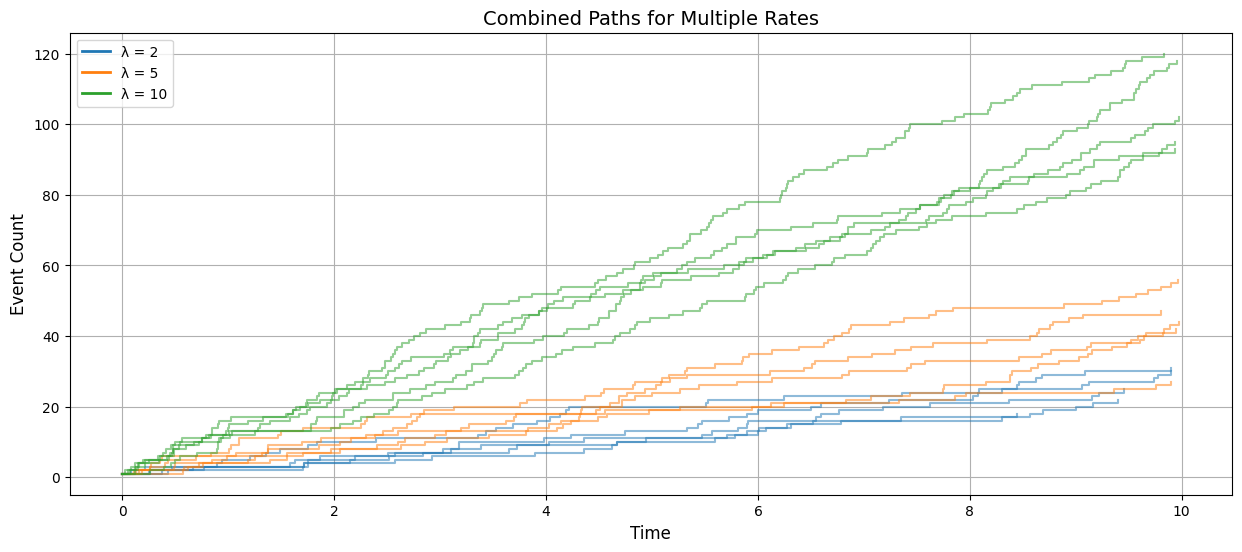

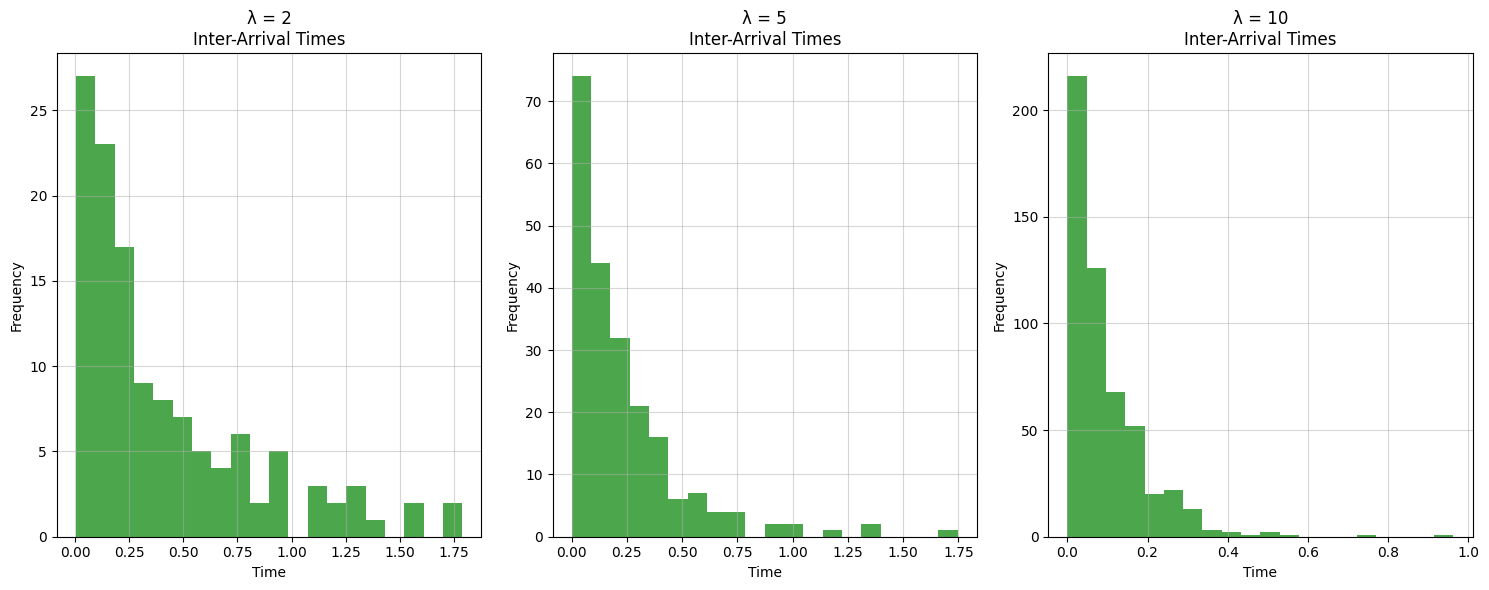

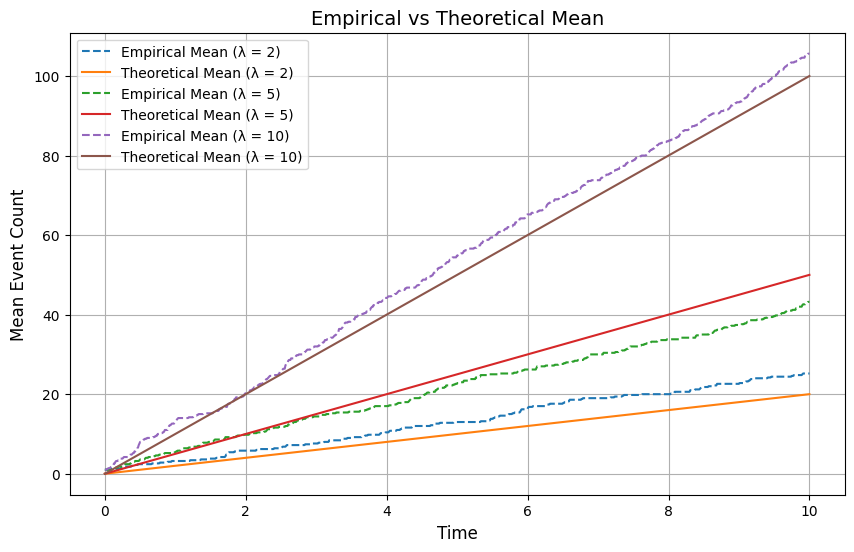

In [14]:
all_paths, inter_arrival_data = simulate_multiple_rates_and_paths(rates, num_paths, T)
plot_combined_paths(all_paths, T)
plot_interarrival_histograms(inter_arrival_data, rates)
plot_empirical_vs_theoretical_mean(all_paths, rates, T)

#### 2. Simulation of Spike Trains Using an Inhomogeneous Poisson Process with Oscillatory Firing Rate

Method 1: Simulating the Inhomogeneous Poisson Process using the Bernoulli Approximation

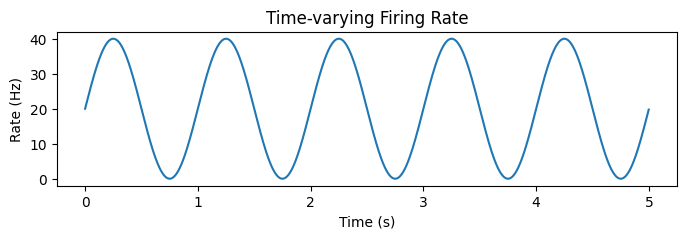

In [15]:
# Parameters for the simulation
tmax = 5  
max_rate = 40 
f_osc = 1
bin_size = 0.002 
time = np.arange(0, tmax, bin_size) 

rate = max_rate * (np.sin(2 * np.pi * f_osc * time) + 1) / 2
plt.figure(figsize=(8, 2))
plt.plot(time, rate)
plt.ylabel('Rate (Hz)')
plt.xlabel('Time (s)')
plt.title('Time-varying Firing Rate')
plt.show()

In [16]:
def inhomogeneous_poisson(rate, bin_size):
    n_bins = len(rate) 
    spikes = np.random.rand(n_bins) < rate * bin_size  
    spike_times = np.nonzero(spikes)[0] * bin_size  
    return spike_times

In [17]:
def inhomogeneous_poisson_generator(n_trials, rate, bin_size):
    for i in range(n_trials):
        yield inhomogeneous_poisson(rate, bin_size)

In [18]:
def raster_plot_multi(spike_times):
    for i, spt in enumerate(spike_times):
        plt.vlines(spt, i, i + 1)  
    plt.yticks([])  

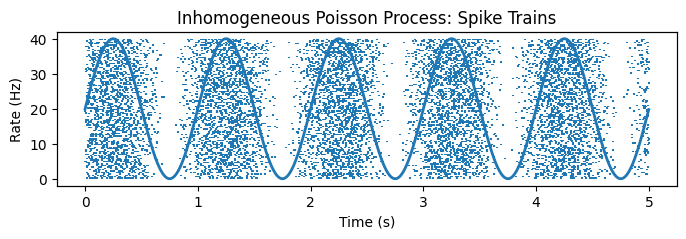

In [19]:
n_trials = 100  # Number of trials

# Simulate spike trains for 100 trials
spike_times = list(inhomogeneous_poisson_generator(n_trials, rate, bin_size))

# Plot the rate function
plt.figure(figsize=(8, 2))
plt.plot(time, rate, lw=2, label='Rate (Hz)')
plt.ylabel('Rate (Hz)')
plt.xlabel('Time (s)')

# Plot the raster plot for spike trains
plt.twinx()  # Create a second y-axis
raster_plot_multi(spike_times)

plt.title('Inhomogeneous Poisson Process: Spike Trains')
plt.show()


Method 2: Simulating the Inhomogeneous Poisson Process using the Thinning Algorithm

In [20]:
def thinning_method(rate_function, lambda_max, T):
    t = 0
    event_times = []
    
    while t < T:
        u = np.random.uniform(0, 1)
        w = -np.log(u) / lambda_max
        t += w
        
        # Generate a uniform random number for thinning
        D = np.random.uniform(0, 1)
        if D <= rate_function(t) / lambda_max:
            event_times.append(t)
    
    return np.array(event_times)

In [22]:
# Example with oscillatory rate function
tmax = 5  # seconds
max_rate = 40  # Hz
f_osc = 1  # Hz
lambda_max = 40  # max rate
time = np.arange(0, tmax, 0.001)

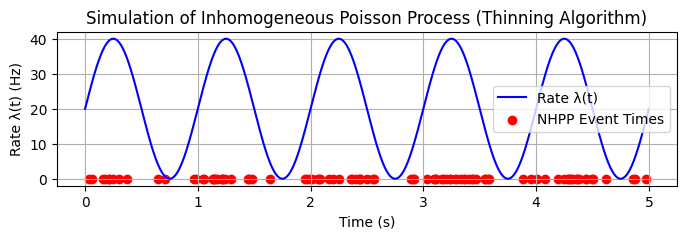

In [23]:
rate_function = lambda t: lambda_max * (np.sin(2 * np.pi * f_osc * t) + 1) / 2

# Simulating the NHPP using the Thinning method
nhpp_times = thinning_method(rate_function, lambda_max, tmax)

# Plotting the results
plt.figure(figsize=(8, 2))
plt.plot(time, rate_function(time), label="Rate λ(t)", color='blue')
plt.scatter(nhpp_times, np.zeros_like(nhpp_times), color="red", label="NHPP Event Times")
plt.title("Simulation of Inhomogeneous Poisson Process (Thinning Algorithm)")
plt.xlabel("Time (s)")
plt.ylabel("Rate λ(t) (Hz)")
plt.legend()
plt.grid()
plt.show()